In [ ]:
# Miles McBride Performance Analysis
# New York Knicks - Data Analysis Project
# Install required library (run this first!)
# Only need to run this once per session - KK
# https://github.com/swar/nba_api/tree/master/docs/nba_api/stats/endpoints link to the endpoints -KK
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
# Import libraries
# Also only once per session - KK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import playercareerstats, playergamelog, commonplayerinfo
from nba_api.stats.static import players
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")
print("=" * 60)


✅ Libraries imported successfully!


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 7.4 MB/s eta 0:00:00
✅ Libraries imported successfully!
Player Found: Miles McBride
Player ID: 1630540
Active: True

📊 Career Overview:
  SEASON_ID TEAM_ABBREVIATION  GP   MIN  PTS  AST  REB  STL  FG_PCT  FG3_PCT
0   2021-22               NYK  40   372   89   41   42   14   0.296    0.250
1   2022-23               NYK  64   760  222   72   50   37   0.358    0.299
2   2023-24               NYK  68  1328  562  114  100   50   0.452    0.410
3   2024-25               NYK  64  1593  611  187  161   67   0.406    0.369
4   2025-26               NYK  12   289  121   29   30    9   0.396    0.375

📈 Per-Game Averages by Season:
  SEASON_ID  GP    MPG    PPG   APG   RPG   SPG  FG_PCT  FG3_PCT
0   2021-22  40   9.30   2.22  1.02  1.05  0.35    0.30     0.25
1   2022-23  64  11.88   3.47  1.12  0.78  0.58    0.36     0.30
2   2023-24  68  19.53   8.26  1.68  1.47  0.74    0.45     0.41
3   2024-25  64  24.89   9.55  2.92  2.52  1.05    

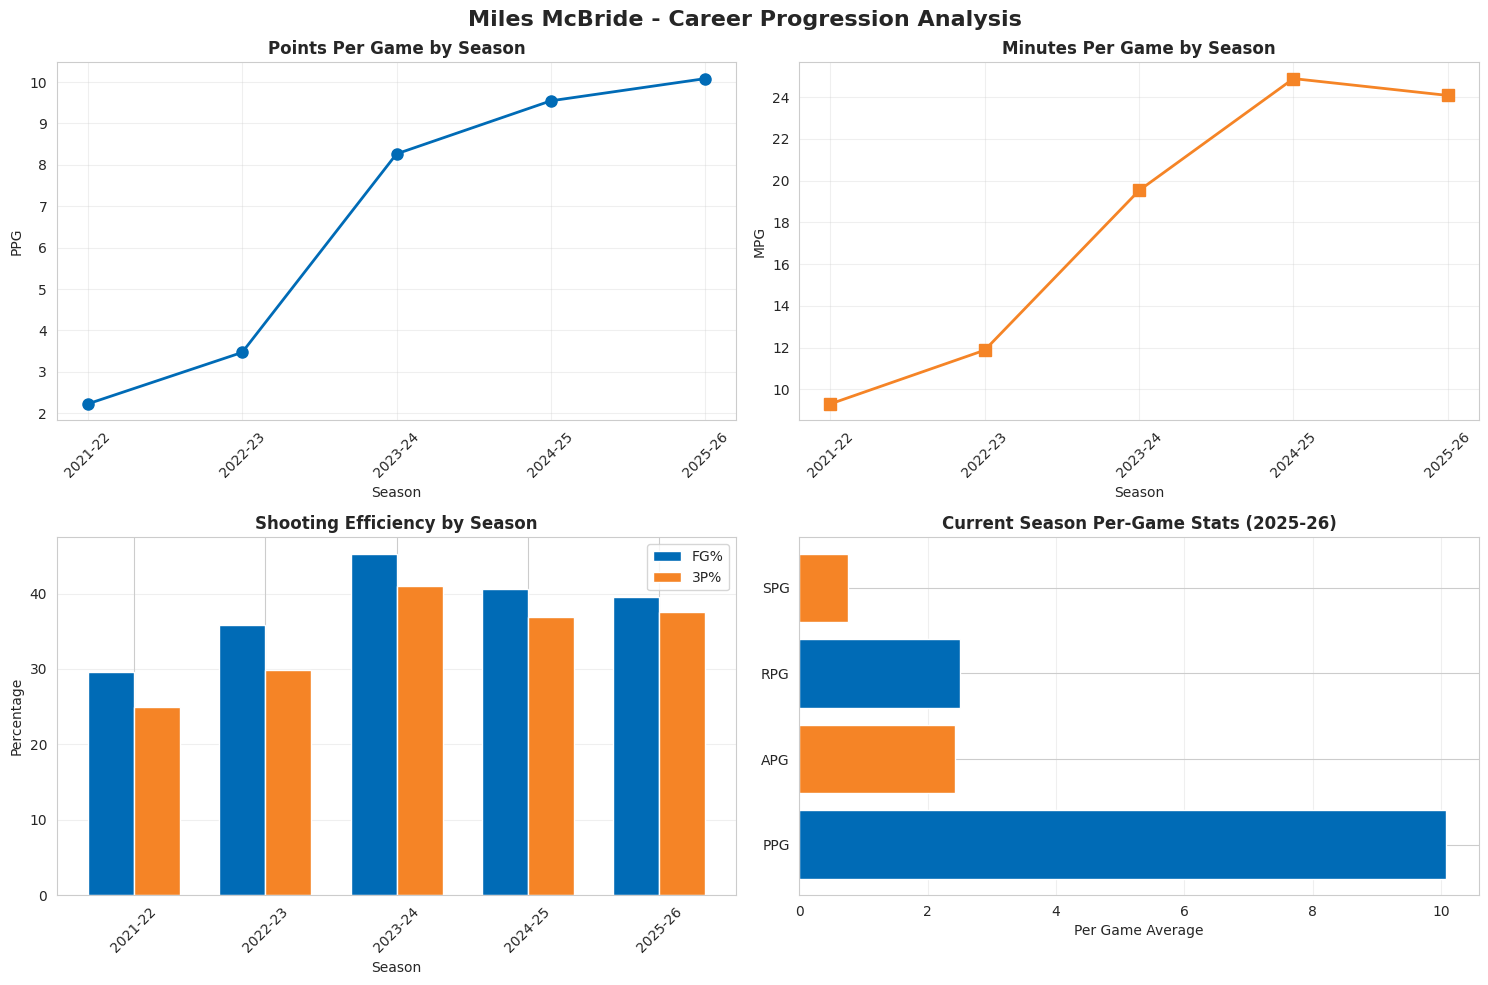


🔍 KEY INSIGHTS:
📊 Scoring Growth: +7.9 PPG (from 2.2 to 10.1)
⏱️  Playing Time Growth: +14.8 MPG (from 9.3 to 24.1)
🎯 Current 3P%: 37.5%
🛡️  Current Steals: 0.8 SPG
📅 Total Games Played: 248

✅ Strong three-point shooter (above league average)
✅ Significant scoring improvement over career

🚀 NEXT STEPS TO EXPAND YOUR ANALYSIS:
1. Get game-by-game data for the current season
2. Analyze performance in wins vs losses
3. Compare stats as starter vs bench player
4. Look at shooting zones and shot charts
5. Analyze performance against specific opponents
6. Compare to other Knicks guards

Ready to dive deeper? Let me know which analysis you want next!


In [ ]:
# ==============================================================================
# STEP 1: Get Miles McBride's Player ID
# ==============================================================================

# Find Miles McBride
all_players = players.get_players()
mcbride = [player for player in all_players if player['full_name'] == 'Miles McBride'][0]

print(f"Player Found: {mcbride['full_name']}")
print(f"Player ID: {mcbride['id']}")
print(f"Active: {mcbride['is_active']}")
print("=" * 60)

# ==============================================================================
# STEP 2: Get Career Stats
# ==============================================================================

# Fetch career statistics
career = playercareerstats.PlayerCareerStats(player_id=mcbride['id'])
career_df = career.get_data_frames()[0]

print("\n📊 Career Overview:")
print(career_df[['SEASON_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'PTS', 'AST', 'REB', 'STL', 'FG_PCT', 'FG3_PCT']])
print("=" * 60)

# ==============================================================================
# STEP 3: Calculate Per-Game Averages by Season
# ==============================================================================

# Calculate per-game stats
career_df['PPG'] = career_df['PTS'] / career_df['GP']
career_df['APG'] = career_df['AST'] / career_df['GP']
career_df['RPG'] = career_df['REB'] / career_df['GP']
career_df['SPG'] = career_df['STL'] / career_df['GP']
career_df['MPG'] = career_df['MIN'] / career_df['GP']

print("\n📈 Per-Game Averages by Season:")
print(career_df[['SEASON_ID', 'GP', 'MPG', 'PPG', 'APG', 'RPG', 'SPG', 'FG_PCT', 'FG3_PCT']].round(2))
print("=" * 60)

# ==============================================================================
# STEP 4: Visualizations
# ==============================================================================

# Visualization 1: Scoring Progression
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Miles McBride - Career Progression Analysis', fontsize=16, fontweight='bold')

# Points Per Game
axes[0, 0].plot(career_df['SEASON_ID'], career_df['PPG'], marker='o', linewidth=2, markersize=8, color='#006BB6')
axes[0, 0].set_title('Points Per Game by Season', fontweight='bold')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('PPG')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Minutes Per Game
axes[0, 1].plot(career_df['SEASON_ID'], career_df['MPG'], marker='s', linewidth=2, markersize=8, color='#F58426')
axes[0, 1].set_title('Minutes Per Game by Season', fontweight='bold')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('MPG')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Shooting Percentages
x = np.arange(len(career_df['SEASON_ID']))
width = 0.35
axes[1, 0].bar(x - width/2, career_df['FG_PCT'] * 100, width, label='FG%', color='#006BB6')
axes[1, 0].bar(x + width/2, career_df['FG3_PCT'] * 100, width, label='3P%', color='#F58426')
axes[1, 0].set_title('Shooting Efficiency by Season', fontweight='bold')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(career_df['SEASON_ID'], rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# All-Around Stats
stats_to_plot = career_df[['PPG', 'APG', 'RPG', 'SPG']].iloc[-1]
axes[1, 1].barh(stats_to_plot.index, stats_to_plot.values, color=['#006BB6', '#F58426', '#006BB6', '#F58426'])
axes[1, 1].set_title(f'Current Season Per-Game Stats ({career_df["SEASON_ID"].iloc[-1]})', fontweight='bold')
axes[1, 1].set_xlabel('Per Game Average')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ==============================================================================
# STEP 5: Key Insights Summary
# ==============================================================================

print("\n🔍 KEY INSIGHTS:")
print("=" * 60)

# Career progression
latest_season = career_df.iloc[-1]
first_season = career_df.iloc[0]

ppg_growth = latest_season['PPG'] - first_season['PPG']
mpg_growth = latest_season['MPG'] - first_season['MPG']

print(f"📊 Scoring Growth: +{ppg_growth:.1f} PPG (from {first_season['PPG']:.1f} to {latest_season['PPG']:.1f})")
print(f"⏱️  Playing Time Growth: +{mpg_growth:.1f} MPG (from {first_season['MPG']:.1f} to {latest_season['MPG']:.1f})")
print(f"🎯 Current 3P%: {latest_season['FG3_PCT']*100:.1f}%")
print(f"🛡️  Current Steals: {latest_season['SPG']:.1f} SPG")
print(f"📅 Total Games Played: {career_df['GP'].sum()}")

if latest_season['FG3_PCT'] > 0.35:
    print("\n✅ Strong three-point shooter (above league average)")
if latest_season['SPG'] > 0.8:
    print("✅ Solid defensive presence")
if ppg_growth > 3:
    print("✅ Significant scoring improvement over career")

print("=" * 60)

# ==============================================================================
# NEXT STEPS FOR YOUR ANALYSIS
# ==============================================================================

print("\n🚀 NEXT STEPS TO EXPAND YOUR ANALYSIS:")
print("=" * 60)
print("1. Get game-by-game data for the current season")
print("2. Analyze performance in wins vs losses")
print("3. Compare stats as starter vs bench player")
print("4. Look at shooting zones and shot charts")
print("5. Analyze performance against specific opponents")
print("6. Compare to other Knicks guards")
print("\nReady to dive deeper? Let me know which analysis you want next!")